## pyDGSA tutorial (short version)

This analytic example consists of 200 model simulations, each of which has 4 parameters and 2 responses. The model parameters are latin hypercube sampled values between 0 and 1:

| v | w | x | y | z |
|------|------|------|------|------|
|0.7975|0.5725|0.5475|0.0675|0.6225|
|0.8175|0.5125|0.3325|0.1325|0.6175|
|0.2075|0.5925|0.7475|0.3625|0.4625|
| .... | .... | .... | .... | .... |

The responses are calculated as:

| Resp. 1 | Resp. 2 |
|---|---|
| z | abs(x * (y - 1)) |

Clearly, `z` should be the most sensitive parameter, followed by `x` and `y`. This is a modified version of the problem presented in <a href="https:doi.org/10.1007/s11004-014-9530-5">Fenwick et al. (2014)</a>, with two extra parameters (`v` and `w`) that should have no influence on the model response.

In [1]:
import numpy as np

# Load model parameters 
parameters = np.load('sample_data/analytic_params.npy')
responses = np.empty((parameters.shape[0], 2), dtype='float64')

# Construct model responses
responses[:, 0] = parameters[:, 4]
responses[:, 1] = np.abs(parameters[:, 2] * parameters[:, 3]-1)

In [2]:
# Now, calculate the euclidean distances between model responses
from scipy.spatial.distance import pdist, squareform

distances = pdist(responses, metric='euclidean')
distances = squareform(distances)

In [3]:
# Cluster the responses using KMedoids
from pyDGSA.cluster import KMedoids

n_clusters = 3
clusterer = KMedoids(n_clusters=n_clusters, max_iter=3000, tol=1e-4)
labels, medoids = clusterer.fit_predict(distances)

In [4]:
# Calculate mean sensitivity across clusters
from pyDGSA.dgsa import dgsa

sens = dgsa(parameters, labels, parameter_names=['v', 'w', 'x', 'y', 'z'])
print(sens)


   sensitivity
v     0.894977
w     0.481852
x     2.131929
y     2.240401
z     3.760630


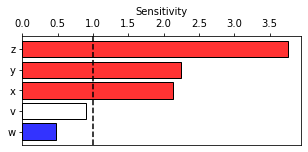

In [5]:
# Generate a pareto plot of the results
from pyDGSA.plot import vert_pareto_plot

fig, ax = vert_pareto_plot(sens)